In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('dataset_2.csv')
data.shape

(50000, 109)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [4]:
from sklearn.feature_selection import mutual_info_classif

In [5]:
reg = mutual_info_classif(X_train,y_train)

In [6]:
reg

array([0.00000000e+00, 3.68037797e-03, 0.00000000e+00, 8.67576676e-04,
       4.95872263e-04, 5.16540220e-03, 5.12931079e-03, 2.83769697e-03,
       0.00000000e+00, 6.85860640e-05, 6.40838597e-04, 9.85117057e-04,
       7.38999512e-04, 5.17114799e-03, 0.00000000e+00, 1.64665814e-02,
       0.00000000e+00, 0.00000000e+00, 3.24550020e-04, 0.00000000e+00,
       3.97314147e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.71954992e-03, 1.51142913e-03, 0.00000000e+00, 0.00000000e+00,
       4.67567533e-03, 1.68495801e-02, 0.00000000e+00, 2.19674867e-03,
       0.00000000e+00, 1.92590136e-03, 3.83359092e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.16641900e-03,
       1.76661530e-03, 2.09146803e-03, 0.00000000e+00, 5.66141967e-03,
       0.00000000e+00, 3.11186485e-04, 0.00000000e+00, 2.91731174e-03,
       0.00000000e+00, 3.21830707e-03, 4.07239327e-02, 1.56108549e-03,
      

Text(0, 0.5, 'values')

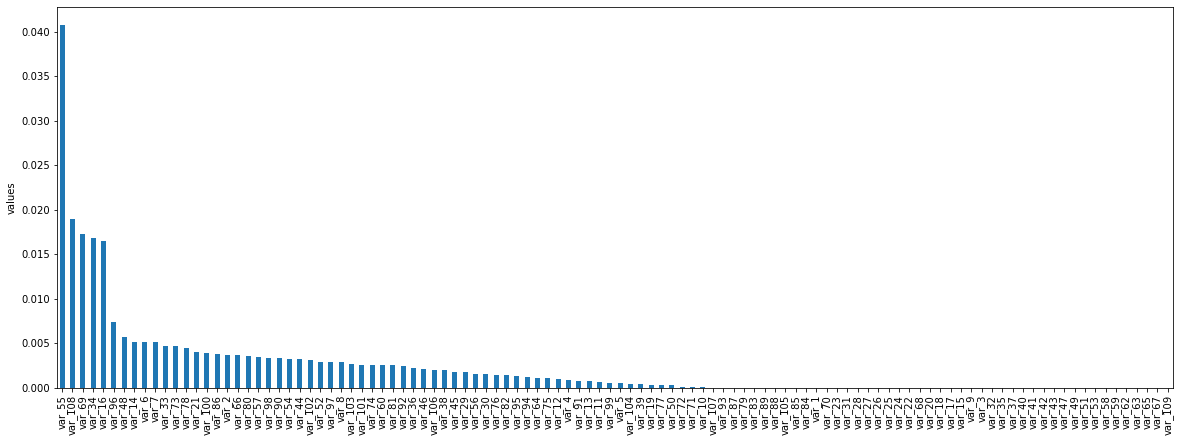

In [9]:
sol = pd.Series(reg)
sol.index = X_train.columns
sol.sort_values(ascending=False).plot.bar(figsize = (20,7))
plt.ylabel('values')

In [10]:
# using selectkbest we can get top categories 

In [11]:
from sklearn.feature_selection import SelectKBest

In [13]:
sel = SelectKBest(mutual_info_classif,k = 10).fit(X_train,y_train)

In [16]:
X_train.columns[sel.get_support()]

Index(['var_6', 'var_7', 'var_14', 'var_16', 'var_34', 'var_48', 'var_55',
       'var_69', 'var_96', 'var_108'],
      dtype='object')

In [17]:
X_train = sel.transform(X_train)

In [18]:
X_test = sel.transform(X_test)

In [25]:
sel.n_features_in_

108

In [46]:
X_train = pd.DataFrame(X_train,columns = ['var_6', 'var_7', 'var_14', 'var_16', 'var_34', 'var_48', 'var_55',
       'var_69', 'var_96', 'var_108'])

In [48]:
### for Regression use same but put mutual_info_regression and in place of k put percentiles , cool simple 

In [49]:
## null values should not be there